In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
# LOAD CSV
df = pd.read_csv('wine.csv')

In [3]:
# INSPECT DATA
print(df.columns)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Class'],
      dtype='object')


In [4]:
df.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,one
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,one
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,one
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,one
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,one
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,one
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,one


In [5]:
df.tail(4)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,three
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,three
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,three
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,three


In [6]:
df.shape

(178, 14)

In [7]:
# VISUALIZACAO DAS ESTATISTICAS DOS TIPO DE DADOS
df.info()
# nao existe nenhum null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class

In [8]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df['Alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64

In [10]:
# MISSING VALUES?
df.isna().any()

Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
Class                           False
dtype: bool

In [11]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [12]:
# COLUMN RENAME
df.rename(columns={"OD280/OD315 of diluted wines":"Protein Concentration"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Alcohol                178 non-null    float64
 1   Malic acid             178 non-null    float64
 2   Ash                    178 non-null    float64
 3   Alcalinity of ash      178 non-null    float64
 4   Magnesium              178 non-null    int64  
 5   Total phenols          178 non-null    float64
 6   Flavanoids             178 non-null    float64
 7   Nonflavanoid phenols   178 non-null    float64
 8   Proanthocyanins        178 non-null    float64
 9   Color intensity        178 non-null    float64
 10  Hue                    178 non-null    float64
 11  Protein Concentration  178 non-null    float64
 12  Proline                178 non-null    int64  
 13  Class                  178 non-null    object 
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB

In [13]:
df_clean = df.drop(df.loc[(df['Ash']<2) & (df['Alcalinity of ash']>15)].index)
print(df_clean)

     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyan

In [14]:
print(df['Class'].value_counts())
(df['Class'].value_counts(normalize=True))

Class
two      71
one      59
three    48
Name: count, dtype: int64


Class
two      0.398876
one      0.331461
three    0.269663
Name: proportion, dtype: float64

Axes(0.125,0.11;0.775x0.77)


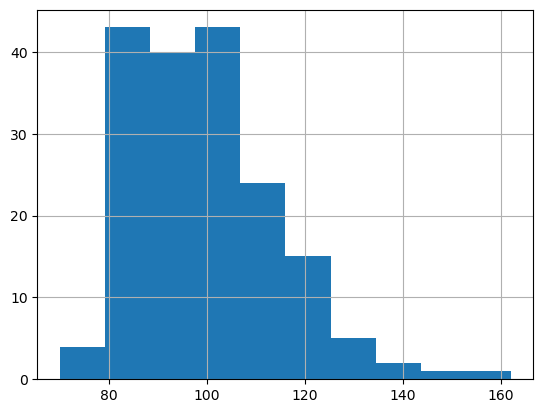

In [15]:
print(df['Magnesium'].hist())

In [21]:
# PAIR PLOTS - ALL VARIABLES
#sns.pairplot(df)

# AGRUPAR POR CLASSE
print(df.groupby(by=['Class']).mean())

         Alcohol  Malic acid       Ash  Alcalinity of ash   Magnesium  \
Class                                                                   
one    13.744746    2.010678  2.455593          17.037288  106.338983   
three  13.153750    3.333750  2.437083          21.416667   99.312500   
two    12.278732    1.932676  2.244789          20.238028   94.549296   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
Class                                                                     
one         2.840169    2.982373              0.290000         1.899322   
three       1.678750    0.781458              0.447500         1.153542   
two         2.258873    2.080845              0.363662         1.630282   

       Color intensity       Hue  Protein Concentration      Proline  
Class                                                                 
one           5.528305  1.062034               3.157797  1115.711864  
three         7.396250  0.682708             

In [22]:
print(df.groupby(by=['Class','Magnesium']).mean())

                 Alcohol  Malic acid   Ash  Alcalinity of ash  Total phenols  \
Class Magnesium                                                                
one   89           13.75        1.73  2.41               16.0           2.60   
      90           13.41        3.84  2.12               18.8           2.45   
      91           14.75        1.73  2.39               11.4           3.10   
      92           13.05        1.73  2.04               12.4           2.72   
      93           13.39        1.77  2.62               16.1           2.85   
...                  ...         ...   ...                ...            ...   
two   134          11.81        2.12  2.74               21.5           1.60   
      136          12.33        0.99  1.95               14.8           1.90   
      139          12.99        1.67  2.60               30.0           3.30   
      151          12.21        1.19  1.75               16.8           1.85   
      162          12.47        1.52  2.

In [26]:
df.groupby(by=['Alcohol','Flavanoids']).mean(numeric_only=True)

Malic acid   Ash  Alcalinity of ash  Magnesium  \
Alcohol Flavanoids                                                   
11.03   2.17              1.51  2.20               21.5       85.0   
11.41   2.01              0.74  2.50               21.0       88.0   
11.45   2.79              2.40  2.42               20.0       96.0   
11.46   2.58              3.74  1.82               19.5      107.0   
11.56   5.08              2.05  3.23               28.5      119.0   
...                        ...   ...                ...        ...   
14.38   3.17              3.59  2.28               16.0      102.0   
        3.64              1.87  2.38               12.0      102.0   
14.39   2.52              1.87  2.45               14.6       96.0   
14.75   3.69              1.73  2.39               11.4       91.0   
14.83   2.98              1.64  2.17               14.0       97.0   

                    Total phenols  Nonflavanoid phenols  Proanthocyanins  \
Alcohol Flavanoids                                                         
11.03   2.17                 2.46                  0.52             2.01   
11.41   2.01                 2.48                  0.42             1.44   
11.45   2.79                 2.90                  0.32             1.83   
11.46   2.58                 3.18                  0.24             3.58   
11.56   5.08                 3.18                  0.47             1.87   
...                           ...                   ...              ...   
14.38   3.17                 3.25                  0.27             2.19   
        3.64                 3.30                  0.29             2.96   
14.39   2.52                 2.50                  0.30             1.98   
14.75   3.69                 3.10                  0.43             2.81   
14.83   2.98                 2.80                  0.29             1.98   

                    Color intensity   Hue  Protein Concentration  Proline  \
Alcohol Flavanoids                                                          
11.03   2.17                   1.90  1.71                   2.87    407.0   
11.41   2.01                   3.08  1.10                   2.31    434.0   
11.45   2.79                   3.25  0.80                   3.39    625.0   
11.46   2.58                   2.90  0.75                   2.81    562.0   
11.56   5.08                   6.00  0.93                   3.69    465.0   
...                             ...   ...                    ...      ...   
14.38   3.17                   4.90  1.04                   3.44   1065.0   
        3.64                   7.50  1.20                   3.00   1547.0   
14.39   2.52                   5.25  1.02                   3.58   1290.0   
14.75   3.69                   5.40  1.25                   2.73   1150.0   
14.83   2.98                   5.20  1.08                   2.85   1045.0   

                    alcohol_binned  
Alcohol Flavanoids                  
11.03   2.17                   0.0  
11.41   2.01                   0.0  
11.45   2.79                   0.0  
11.46   2.58                   0.0  
11.56   5.08                   0.0  
...                            ...  
14.38   3.17                   2.0  
        3.64                   2.0  
14.39   2.52                   2.0  
14.75   3.69                   2.0  
14.83   2.98                   2.0  

[178 rows x 12 columns]

In [27]:
# BINNING
estimator = preprocessing.KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile')
df['alcohol_binned']= estimator.fit_transform(df[['Alcohol']])
print('Bin Edges')
print(estimator.bin_edges_[0])
print('Alcohol Groups')
print(df.groupby(by=['alcohol_binned']).mean(numeric_only=True))

Bin Edges
[11.03 12.52 13.48 14.83]
Alcohol Groups
                  Alcohol  Malic acid       Ash  Alcalinity of ash  \
alcohol_binned                                                       
0.0             12.071017    2.031356  2.281525          20.281356   
1.0             13.001207    2.692414  2.365172          19.829310   
2.0             13.899180    2.292787  2.450000          18.416393   

                 Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
alcohol_binned                                                                
0.0              95.305085       2.220169    1.947458              0.376949   
1.0              99.810345       2.054310    1.657414              0.379655   
2.0             103.967213       2.596557    2.461967              0.330328   

                Proanthocyanins  Color intensity       Hue  \
alcohol_binned                                               
0.0                    1.627458         3.280169  1.020610   
1.0             

<Axes: xlabel='Proline', ylabel='Count'>

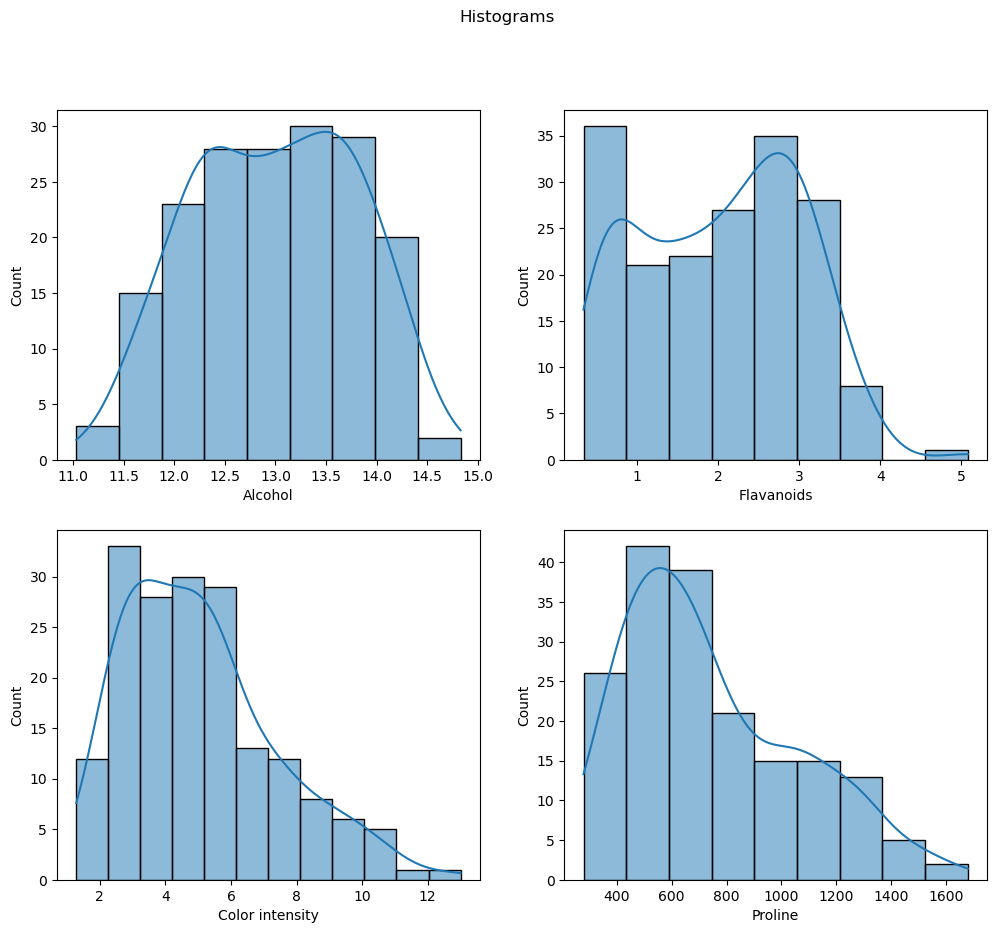

In [31]:
#STATISTICAL DISPERSION

fig,axs = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Histograms')
sns.histplot(df['Alcohol'],ax=axs[0,0],kde=True)
sns.histplot(df['Flavanoids'],ax=axs[0,1],kde=True)
sns.histplot(df['Color intensity'],ax=axs[1,0],kde=True)
sns.histplot(df['Proline'],ax=axs[1,1],kde=True)

c:\Users\joaop\miniconda3\envs\mypython3version\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


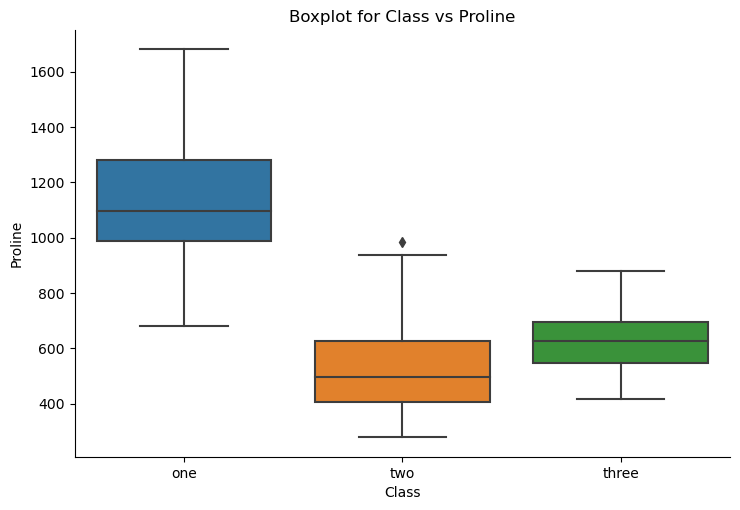

In [32]:
#BOX PLOTS outliers

sns.catplot(x="Class",y="Proline",data=df,kind="box",aspect=1.5)
plt.title("Boxplot for Class vs Proline")
plt.show()

<Axes: xlabel='Flavanoids', ylabel='Proline'>

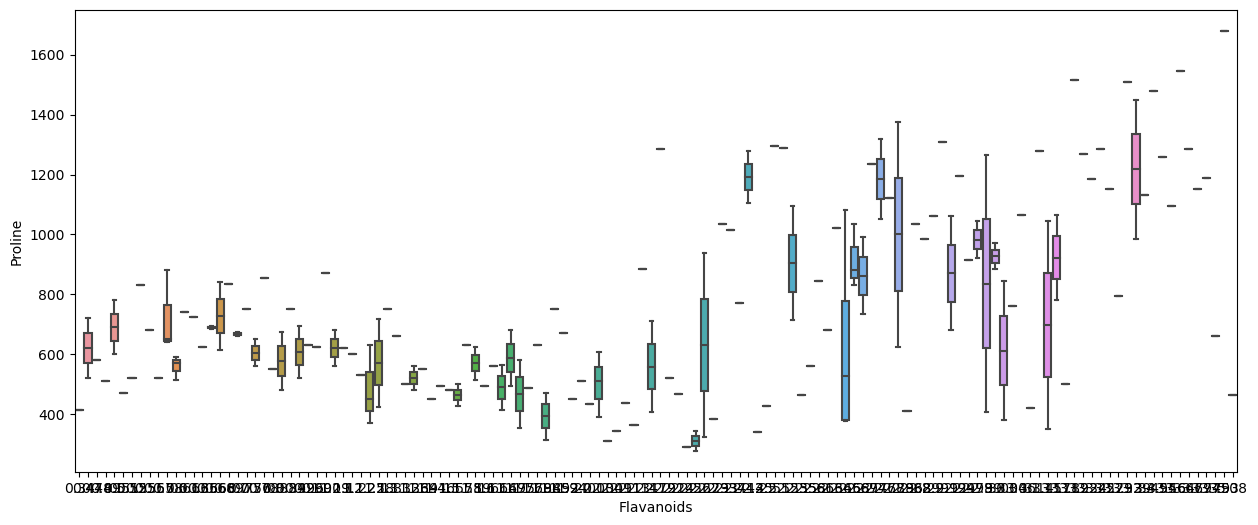

In [33]:
_,ax = plt.subplots(figsize=(15,6))
fig.suptitle('Boxplot for Flavanoids vs Proline')
sns.boxplot(x=df["Flavanoids"],y=df["Proline"])

<Axes: >

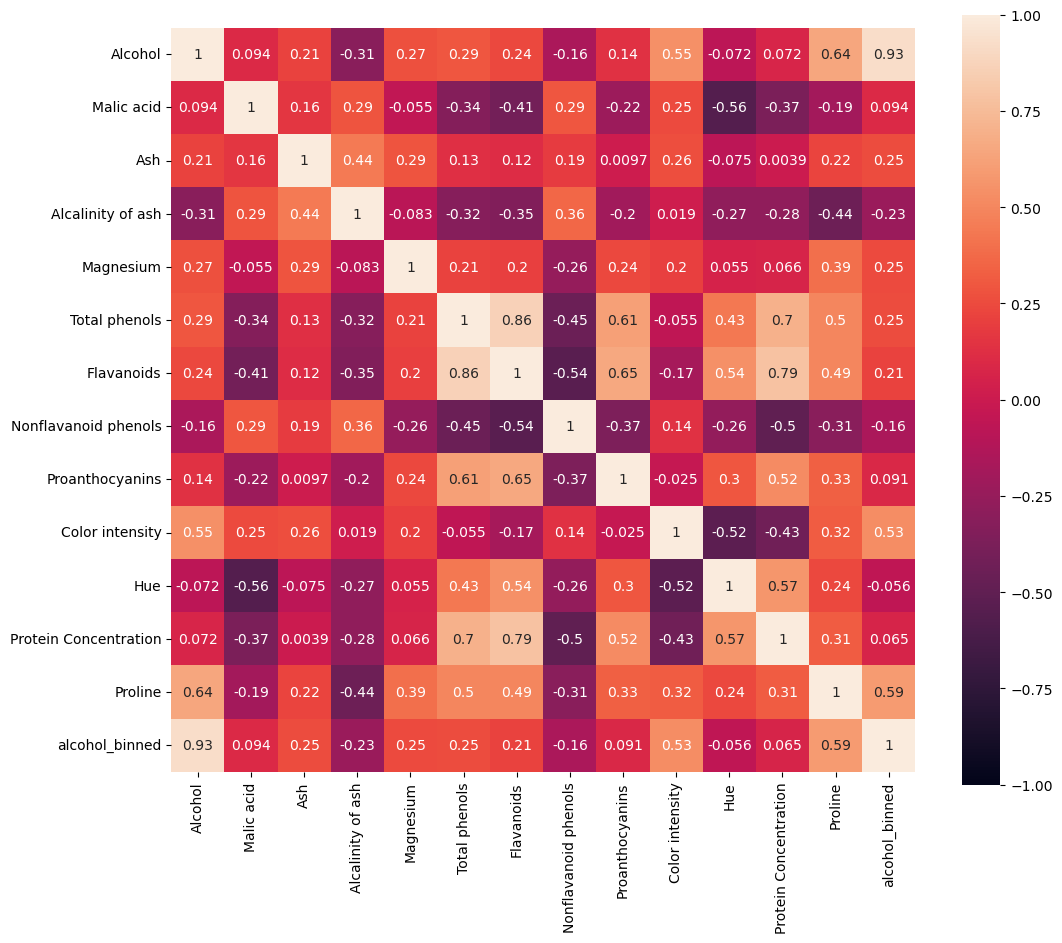

In [38]:
# CORRELATION

corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True,annot=True)